Presented by: Mallikarjun A J





## Data Description: 
Here we have taken data related to turbine engine and its properties. The dataset contains 20631 and 28 columns (features). We have features contianing temprature points, pressure points, unit id's or machine numbers, number of cycles before failure.
## Objective: 
The objective is to find relation or patterns to model ML and DL algorithms to predict the turbine engine life and warn the end user before the machine fails.
## Question and answering with data:
 The user feed in the features to the model and the model helps the user to predict.


## Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

Reading csv files

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Datasets/Engine_dataset/train_FD001.txt",sep=" ",header=None)
data_RUL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Datasets/Engine_dataset/FD001.txt",sep=" ",header=None)
data_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
data_RUL

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


## Column renaming and data cleaning

In [ ]:
data_train.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)



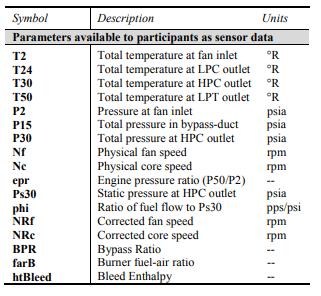
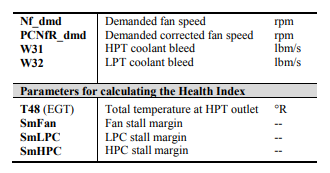


In [ ]:
columns_train = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
data_train.columns = columns_train
data_train

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


## Exploratory data analysis
CREATING A DATAFRAME TO IDENTIFY THE MAX  CYCLES IN REFERENCE TO UNIT ID

In [ ]:
data_train_cycles = data_train.loc[:, 'unit_ID':'cycles']
data_train_cycles

,unit_ID,cycles
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
20626,100,196
20627,100,197
20628,100,198
20629,100,199


In [ ]:
data_train.unit_ID.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
data_train_cycles_failure = pd.DataFrame(data_train.groupby('unit_ID')['cycles'].max()).reset_index()
data_train_cycles_failure.columns = ['unit_ID', 'failure']
data_train_cycles_failure

,unit_ID,failure
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [ ]:
data_train=data_train.merge(data_train_cycles_failure,on=['unit_ID'],how='left')
data_train['RUL']=data_train['failure']-data_train["cycles"]
data_train

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,failure,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


In [ ]:
columns_RUL = ['RUL']
data_RUL.columns = columns_RUL
data_RUL.insert(0, 'unit_ID', range(1, 1 + len(data_RUL)))
data_RUL

,unit_ID,RUL
0,1,112
1,2,98
2,3,69
3,4,82
4,5,91
...,...,...
95,96,137
96,97,82
97,98,59
98,99,117


FING THE UNIT ID WITH HIGHEST NUMBER OF CYCLES

In [ ]:
data_train_cycles.loc[data_train_cycles['cycles'].idxmax()]

unit_ID     69
cycles     362
Name: 13992, dtype: int64

In [ ]:
unit_ID_69 = data_train.loc[13631:13992, ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32', 'failure','RUL']]
unit_ID_69

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,failure,RUL
13631,69,1,-0.0014,-0.0001,100.0,518.67,641.96,1587.10,1400.65,14.62,...,8136.88,8.4094,0.03,392,2388,100.0,38.87,23.4081,362,361
13632,69,2,-0.0003,-0.0004,100.0,518.67,641.50,1594.24,1401.54,14.62,...,8139.88,8.4172,0.03,392,2388,100.0,39.02,23.4189,362,360
13633,69,3,0.0006,-0.0003,100.0,518.67,642.73,1585.41,1405.22,14.62,...,8136.42,8.3869,0.03,392,2388,100.0,38.82,23.3756,362,359
13634,69,4,-0.0001,-0.0003,100.0,518.67,642.00,1586.57,1408.44,14.62,...,8142.92,8.3890,0.03,391,2388,100.0,38.99,23.2744,362,358
13635,69,5,0.0026,0.0002,100.0,518.67,642.37,1582.60,1403.07,14.62,...,8138.93,8.4042,0.03,392,2388,100.0,38.87,23.3195,362,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,69,358,0.0040,-0.0002,100.0,518.67,643.74,1609.53,1428.26,14.62,...,8129.59,8.5460,0.03,397,2388,100.0,38.53,23.0549,362,4
13989,69,359,0.0013,0.0003,100.0,518.67,643.46,1603.83,1429.82,14.62,...,8131.20,8.5116,0.03,396,2388,100.0,38.28,23.0610,362,3
13990,69,360,0.0004,-0.0001,100.0,518.67,643.97,1597.75,1428.85,14.62,...,8126.63,8.5059,0.03,396,2388,100.0,38.47,23.0422,362,2
13991,69,361,0.0016,-0.0002,100.0,518.67,643.65,1603.50,1433.95,14.62,...,8132.97,8.5270,0.03,396,2388,100.0,38.52,23.1208,362,1


VISUALISING THE FEATURES AGAINTS THE COLUMN "CYCLES" 

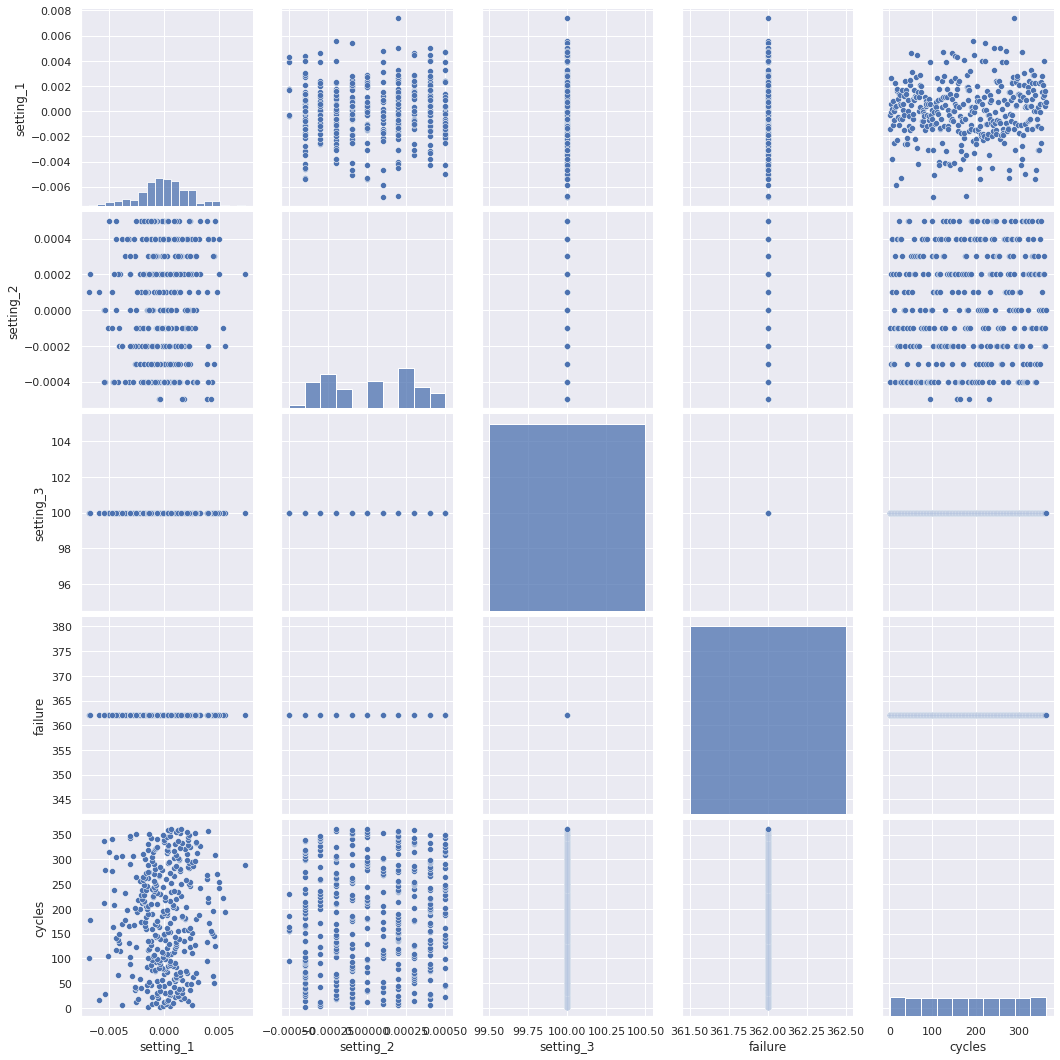

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

sns.set()
cols = ['setting_1','setting_2','setting_3','failure', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

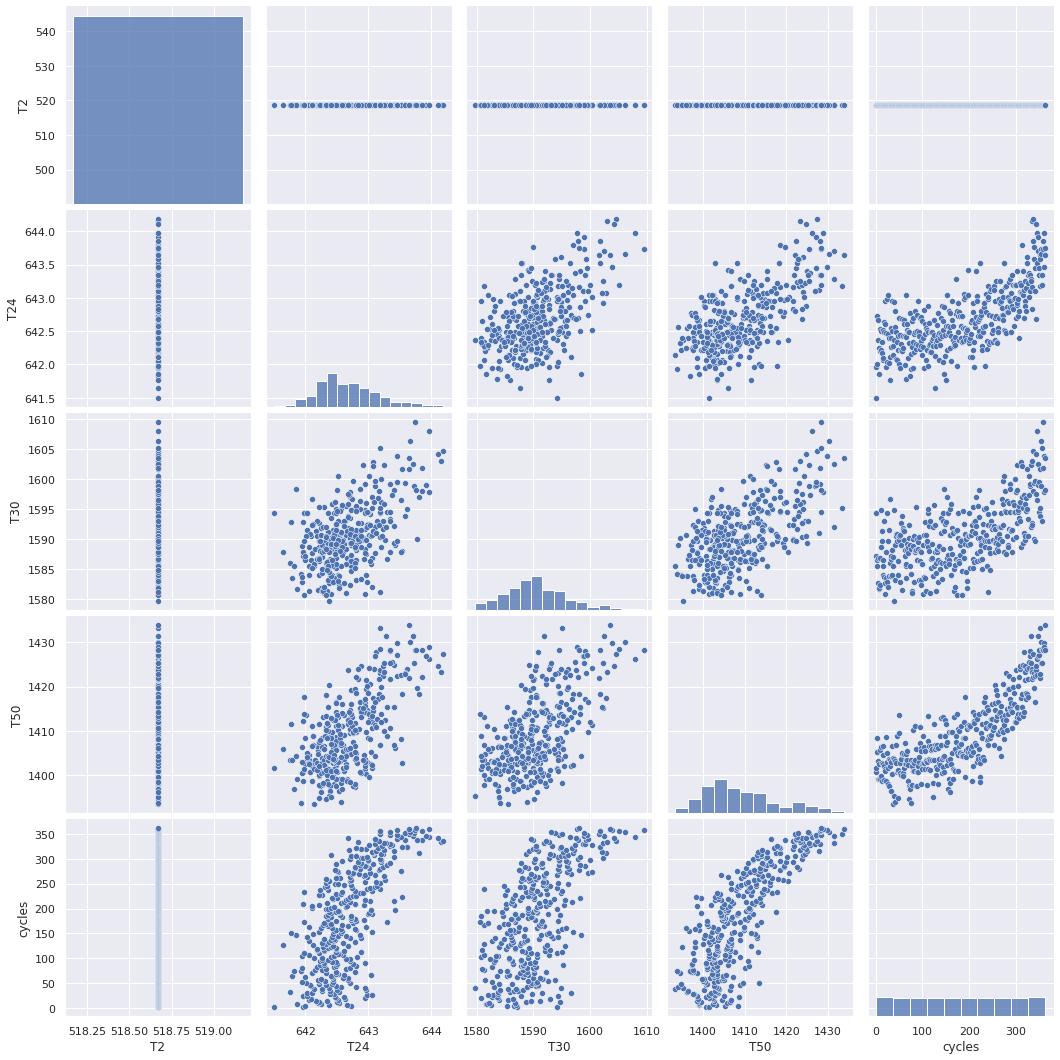

In [ ]:
sns.set()
cols = ['T2','T24','T30','T50', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

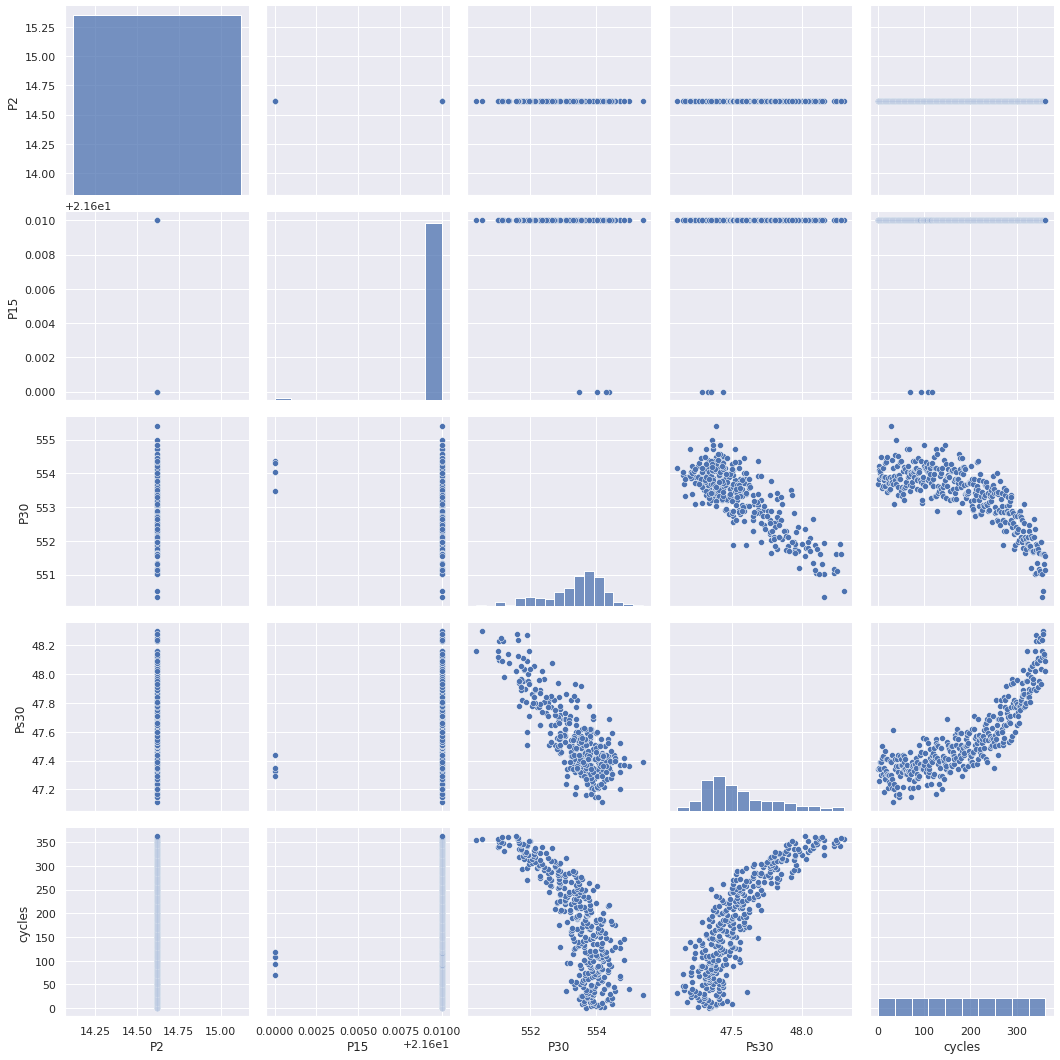

In [ ]:
sns.set()
cols = ['P2','P15','P30','Ps30', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

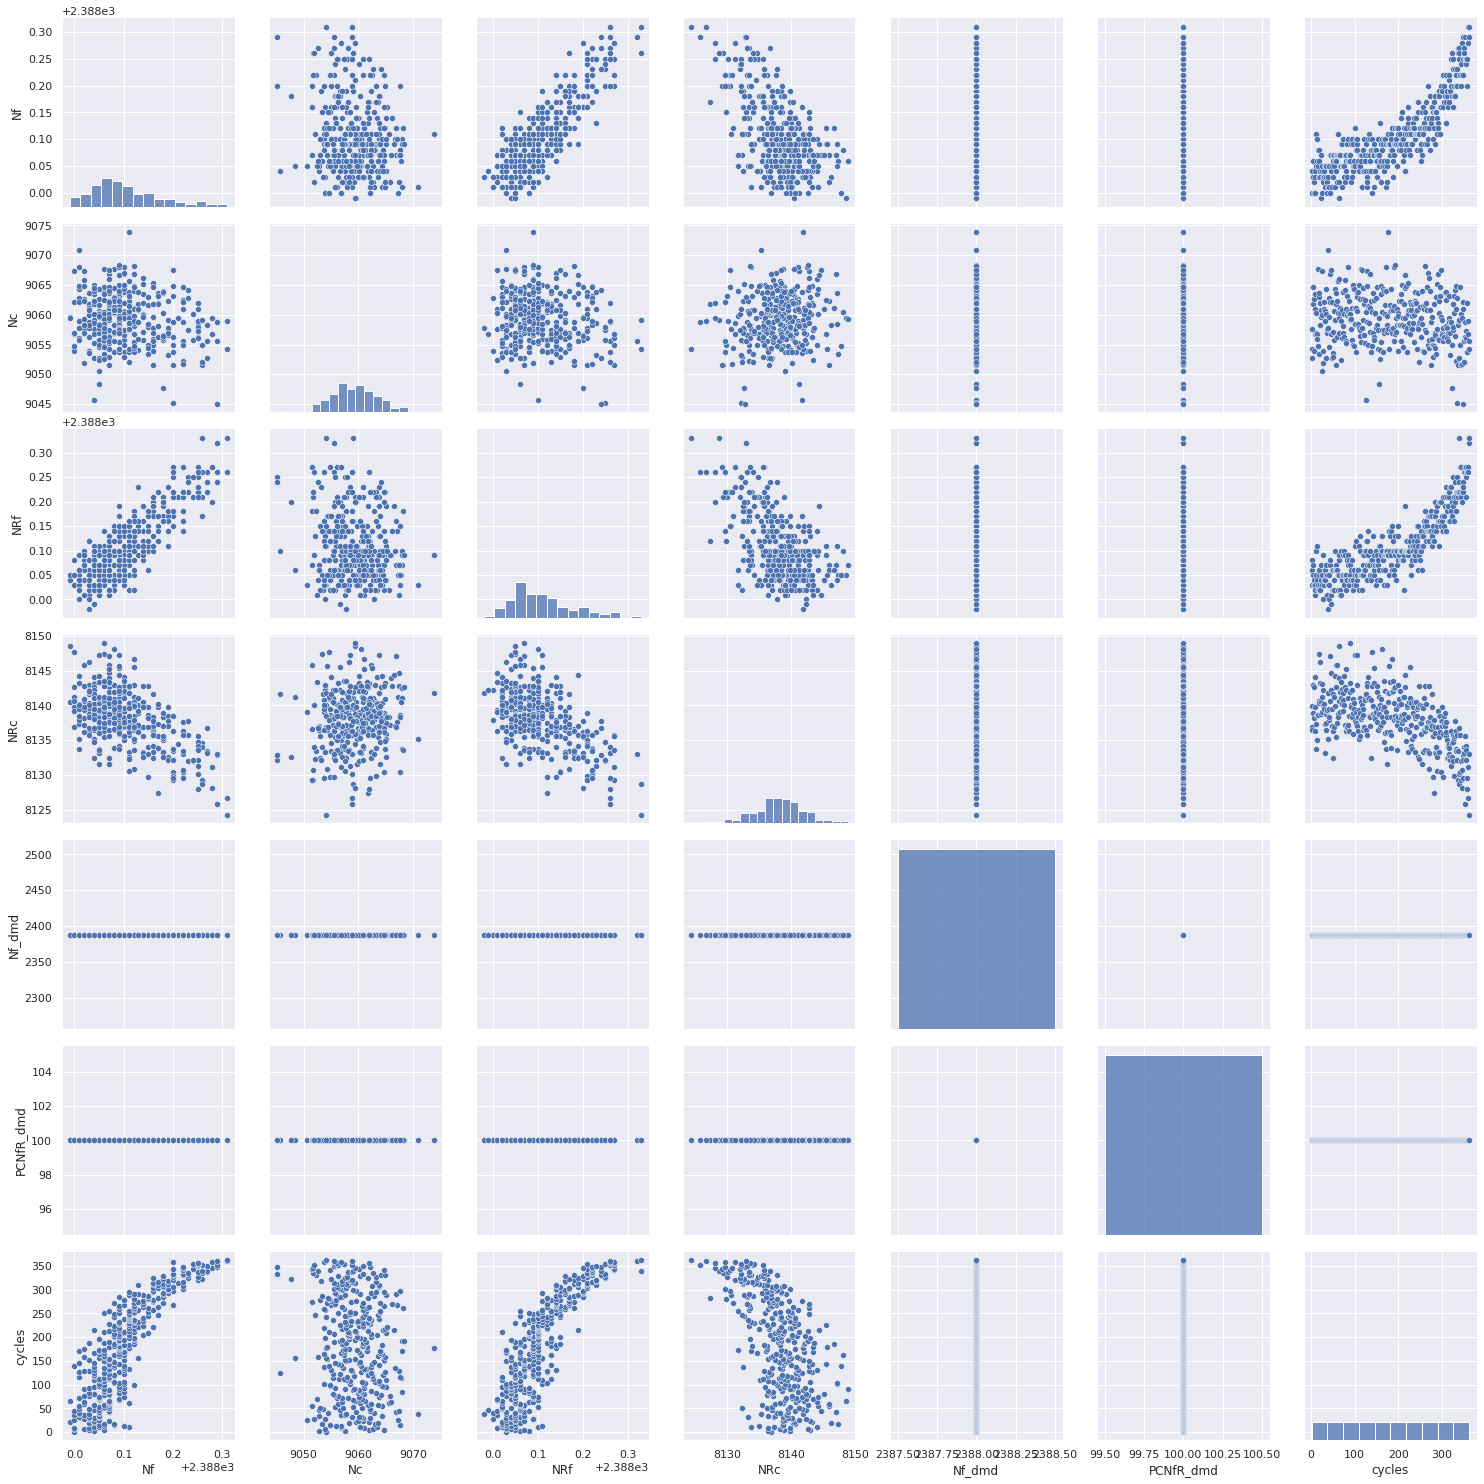

In [ ]:
sns.set()
cols = ['Nf','Nc','NRf','NRc','Nf_dmd','PCNfR_dmd', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

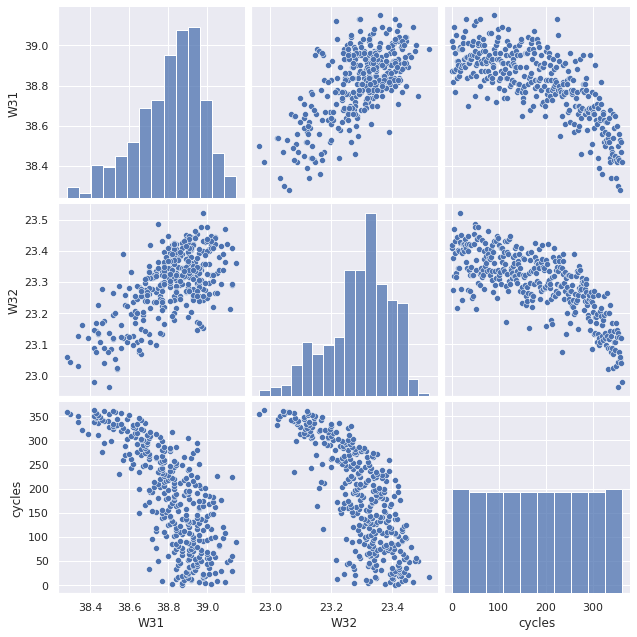

In [ ]:
sns.set()
cols = ['W31','W32', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

FINDING THE IMPORTANCE OF EACH FEATURE FROM 0-1

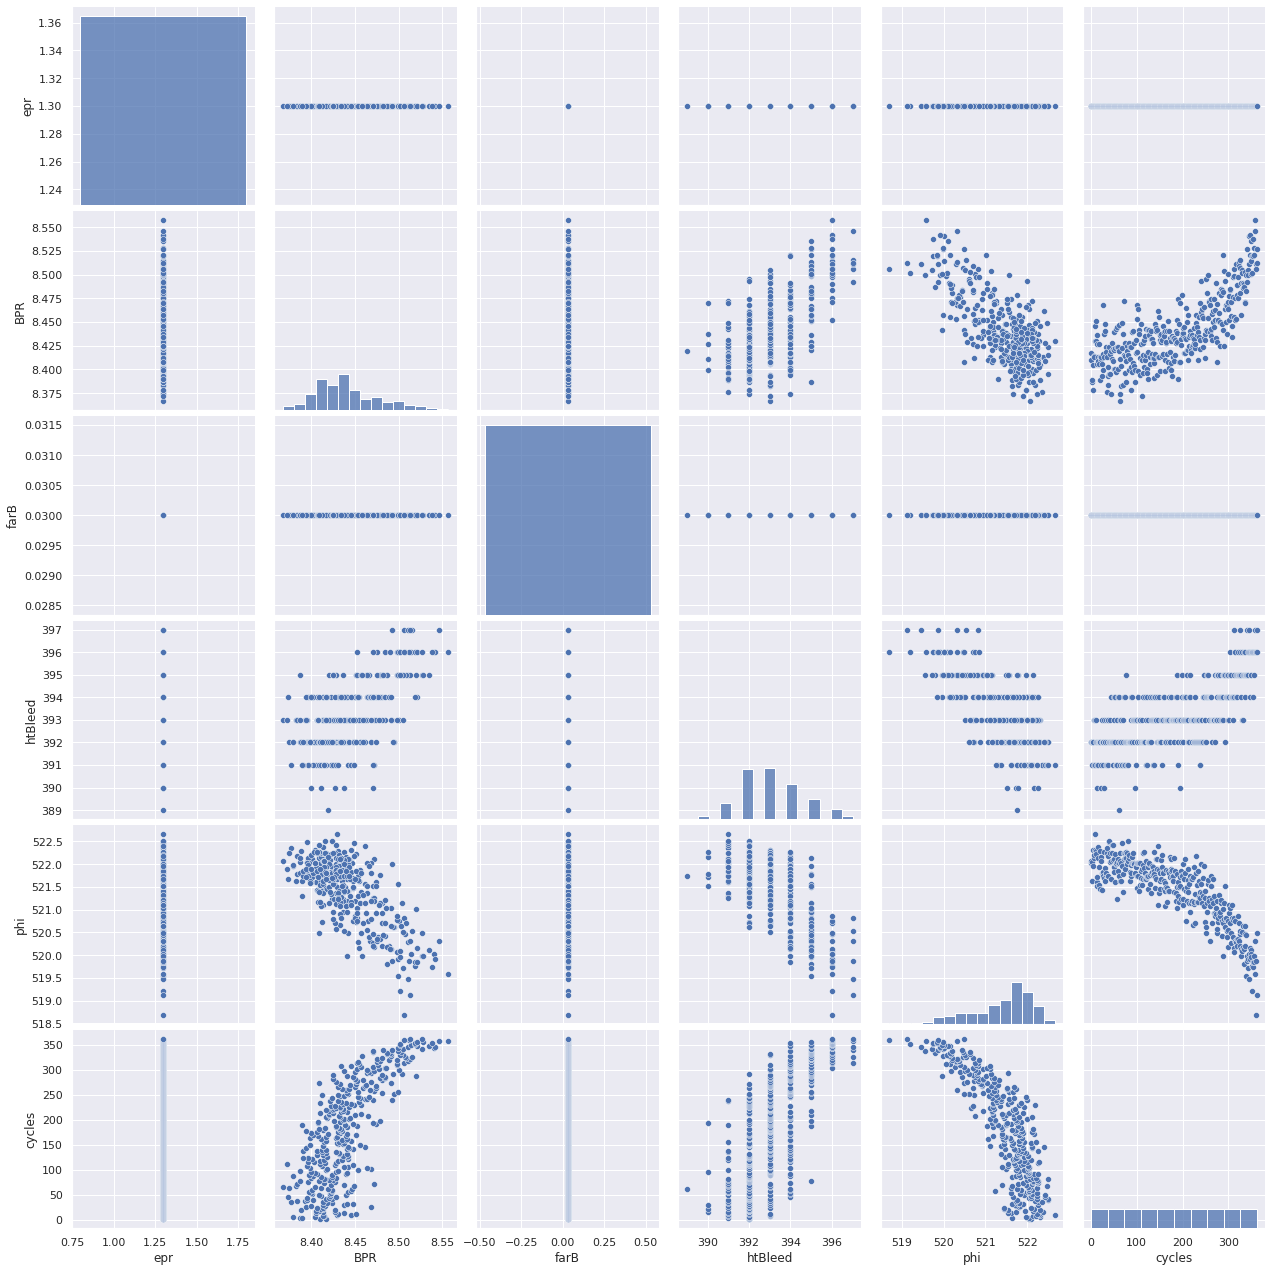

In [ ]:
sns.set()
cols = ['epr','BPR', 'farB', 'htBleed','phi', 'cycles']
sns.pairplot(unit_ID_69[cols], size = 3)
plt.show();

## Feature selection

In [ ]:
X = data_train.copy()
y = X.pop('cycles')

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
discrete_features

unit_ID       True
setting_1    False
setting_2    False
setting_3    False
T2           False
T24          False
T30          False
T50          False
P2           False
P15          False
P30          False
Nf           False
Nc           False
epr          False
Ps30         False
phi          False
NRf          False
NRc          False
BPR          False
farB         False
htBleed       True
Nf_dmd        True
PCNfR_dmd    False
W31          False
W32          False
failure       True
RUL           True
dtype: bool

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

RUL          0.633310
Ps30         0.280090
T50          0.265700
phi          0.252747
P30          0.244219
W32          0.228445
BPR          0.226155
Nc           0.221575
htBleed      0.202568
NRc          0.201095
W31          0.199649
T24          0.193219
T30          0.191289
Nf           0.143232
NRf          0.140871
setting_3    0.013582
PCNfR_dmd    0.006225
T2           0.003667
farB         0.002550
P15          0.001215
setting_2    0.000150
failure      0.000000
unit_ID      0.000000
Nf_dmd       0.000000
setting_1    0.000000
P2           0.000000
epr          0.000000
Name: MI Scores, dtype: float64

## Preparing data 

In [ ]:
data_train.isnull().sum()

unit_ID      0
cycles       0
setting_1    0
setting_2    0
setting_3    0
T2           0
T24          0
T30          0
T50          0
P2           0
P15          0
P30          0
Nf           0
Nc           0
epr          0
Ps30         0
phi          0
NRf          0
NRc          0
BPR          0
farB         0
htBleed      0
Nf_dmd       0
PCNfR_dmd    0
W31          0
W32          0
failure      0
RUL          0
dtype: int64

In [ ]:
Selected_features = ['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi','RUL']

X = data_train[Selected_features]
y = data_train['cycles']

from sklearn.model_selection import train_test_split

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

## Applying ML Algorithms

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=100)
XGB_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)
XGB_predictions = XGB_model.predict(X_valid)

#Evaluate Model Performance
print('Accuracy valid :', XGB_model.score(X_valid, y_valid))

# Evaluate Error
print('error valid:', mean_absolute_error(y_valid, XGB_predictions))

[15:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy valid : 0.6615155456214252
error valid: 30.635665723268907


In [ ]:
XGB_predictions = XGB_model.predict(X_train)

#Evaluate Model Performance
print('Accuracy train :', XGB_model.score(X_train, y_train))

# Evaluate Error
print('error train:', mean_absolute_error(y_train, XGB_predictions))

Accuracy train : 0.6760121552182824
error train: 30.472281218145195


## Applying DL Algorithms

In [ ]:
from keras import layers
import tensorflow as tf
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation
from sklearn.metrics import r2_score
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

Creating a normalizer layer

In [ ]:
normalizer = layers.Normalization()

In [ ]:
normalizer.adapt(np.asarray(X_train).astype(np.float32))
normalizer.mean.numpy()

array([[6.4267987e+02, 1.5905493e+03, 1.4089352e+03, 5.5336884e+02,
        4.7541500e+01, 2.3880972e+03, 9.0652764e+03, 2.3880967e+03,
        8.1437900e+03, 3.8815987e+01, 2.3289150e+01, 8.4421349e+00,
        3.9321405e+02, 5.2141309e+02, 1.0794222e+02]], dtype=float32)

In [ ]:
def train_and_plot(model,epochs):
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mean_absolute_error'])
  history = model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=epochs,
    validation_split=0.15,
    verbose=0)
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss for Adam')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  y_valid_pred = model.predict(X_valid)
  print("R-Squared Score test", r2_score(y_valid,y_valid_pred))
  print('error test:', mean_absolute_error(y_valid, y_valid_pred))
  y_train_pred = model.predict(X_train)
  print("R-Squared Score train ", r2_score(y_train,y_train_pred))
  print('error train:', mean_absolute_error(y_train, y_train_pred))

Below we compare different models and choose the best performer based on r2 score and error

### Basic model

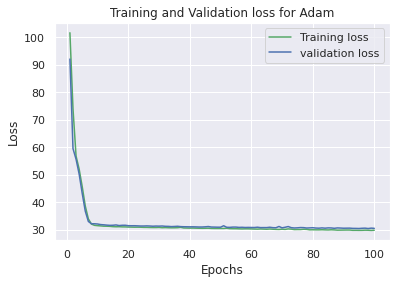

R-Squared Score test 0.6502436211289837
error test: 29.829871108985863
R-Squared Score train  0.6550220655304818
error train: 29.8982314052975


In [ ]:
base_model=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(64, kernel_initializer='normal', activation='relu'),
                             layers.Dense(1,activation='linear')
])
train_and_plot(base_model,100)

### Model 2
Added extra layer

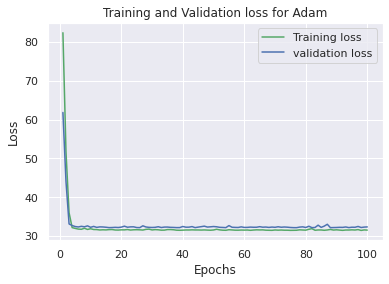

R-Squared Score test 0.588551417200228
error test: 31.258723606199847
R-Squared Score train  0.5890244776408374
error train: 31.744865007732724


In [ ]:
model2=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(16, kernel_initializer='normal',activation='relu'),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model2,100)

### Model 2
Increased Neuron in 3rd layer

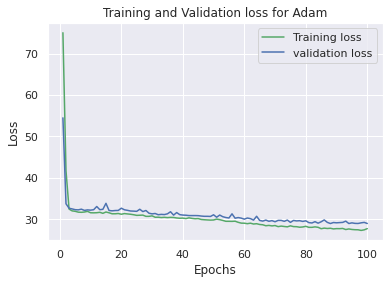

R-Squared Score test 0.6614340604584074
error test: 28.7511735695099
R-Squared Score train  0.6898542647850308
error train: 27.46294495972821


In [ ]:
model2=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model2,100)

### Model 3
adding droput layer

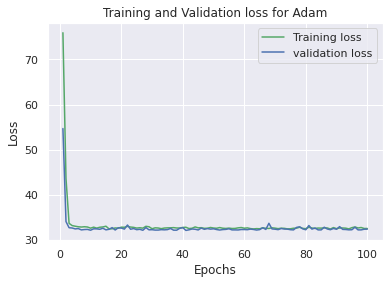

R-Squared Score test 0.5881208631957381
error test: 31.308742227550624
R-Squared Score train  0.5897903235758464
error train: 31.73426128285877


In [ ]:
model3=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model3,100)

### Model 4
Increase layer



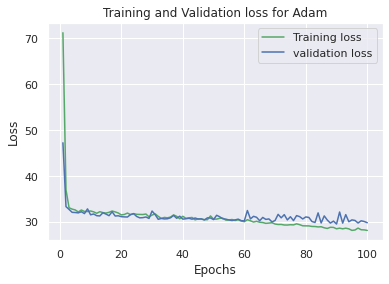

R-Squared Score test 0.6360442603350078
error test: 29.555119871307408
R-Squared Score train  0.661787170975427
error train: 28.501728681358347


In [ ]:
model4=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model4,100)

Model 5
With dropout layer

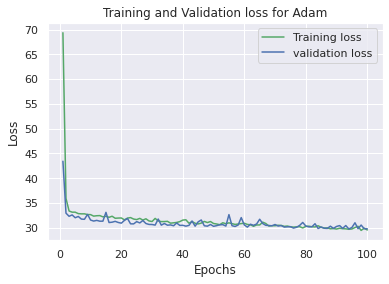

R-Squared Score test 0.6430223694416501
error test: 29.47321670394667
R-Squared Score train  0.6601135360983136
error train: 28.623930537923307


In [ ]:
model5=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model5,100)

Model 5 with LeakyReLU

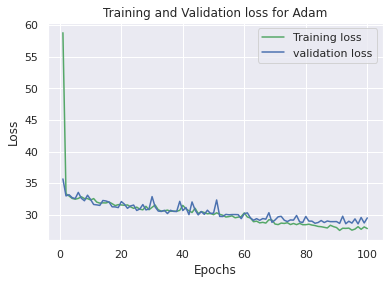

R-Squared Score test 0.6665967705178031
error test: 29.030692102188933
R-Squared Score train  0.7043069728315443
error train: 27.233283321188562


In [ ]:
model5=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(256, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model5,100)

### Model 6
Added another layer



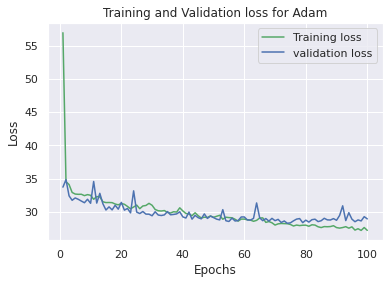

R-Squared Score test 0.657608408559337
error test: 28.965786871775123
R-Squared Score train  0.7190799719100486
error train: 25.89732451972969


In [ ]:
model6=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(256, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(32, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model6,100)

### Model 7
Added another layer and dropout layer

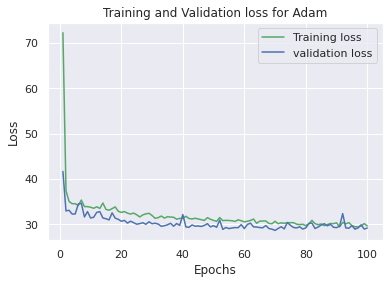

R-Squared Score test 0.6680667529944244
error test: 28.793174553583093
R-Squared Score train  0.7088384647722747
error train: 27.091979991563004


In [ ]:
model7=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(32, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(16, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model7,100)

### Model 8


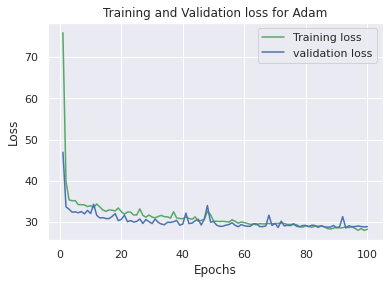

R-Squared Score test 0.6649346379400624
error test: 28.791440985562406
R-Squared Score train  0.7104543827537146
error train: 26.674238597076265


In [ ]:
model5=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(32, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(16, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model5,100)

### Model 8 with 150 epochs

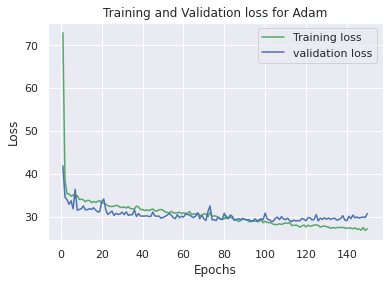

R-Squared Score test 0.6445603463637304
error test: 30.41506945730966
R-Squared Score train  0.71566151350875
error train: 27.055699292916806


In [ ]:
model8=tf.keras.Sequential([
                             normalizer,
                             layers.Dense(128, kernel_initializer='normal', activation='relu'),
                             layers.Dense(64, kernel_initializer='normal',activation='relu'),
                             layers.Dropout(0.2),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(32, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(16, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(64, kernel_initializer='normal',activation='LeakyReLU'),
                             layers.Dropout(0.1),
                             layers.Dense(1,activation='linear')
])
train_and_plot(model8,150)

## Result
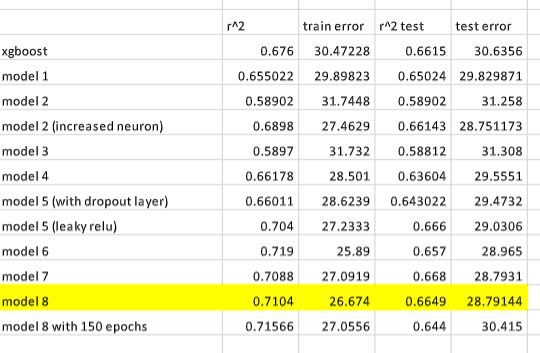

## Conclusion
We found that the deep learning model has outperformed the shallow learning model or machin learning model XGBoost.